In [1]:
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../..')
import leximin_assignment
import assignment

from tqdm import tqdm

In [11]:
N = 100

alphas = np.array([0.9] * (N // 2) + [0.9 * i / (N - N // 2) for i in range(N - N // 2, 0, -1)])[::-1]
betas = np.array([0.9 * i / (N - N // 2) for i in range(1, N - N // 2 + 1)] + [0.9] * (N // 2))[::-1]

print(alphas)
print(betas)

[0.018 0.036 0.054 0.072 0.09  0.108 0.126 0.144 0.162 0.18  0.198 0.216
 0.234 0.252 0.27  0.288 0.306 0.324 0.342 0.36  0.378 0.396 0.414 0.432
 0.45  0.468 0.486 0.504 0.522 0.54  0.558 0.576 0.594 0.612 0.63  0.648
 0.666 0.684 0.702 0.72  0.738 0.756 0.774 0.792 0.81  0.828 0.846 0.864
 0.882 0.9   0.9   0.9   0.9   0.9   0.9   0.9   0.9   0.9   0.9   0.9
 0.9   0.9   0.9   0.9   0.9   0.9   0.9   0.9   0.9   0.9   0.9   0.9
 0.9   0.9   0.9   0.9   0.9   0.9   0.9   0.9   0.9   0.9   0.9   0.9
 0.9   0.9   0.9   0.9   0.9   0.9   0.9   0.9   0.9   0.9   0.9   0.9
 0.9   0.9   0.9   0.9  ]
[0.9   0.9   0.9   0.9   0.9   0.9   0.9   0.9   0.9   0.9   0.9   0.9
 0.9   0.9   0.9   0.9   0.9   0.9   0.9   0.9   0.9   0.9   0.9   0.9
 0.9   0.9   0.9   0.9   0.9   0.9   0.9   0.9   0.9   0.9   0.9   0.9
 0.9   0.9   0.9   0.9   0.9   0.9   0.9   0.9   0.9   0.9   0.9   0.9
 0.9   0.9   0.9   0.882 0.864 0.846 0.828 0.81  0.792 0.774 0.756 0.738
 0.72  0.702 0.684 0.666 0.648 0.63  0.61

In [12]:
cost_matrix = np.array([
    np.sort(np.random.beta(alpha, beta, N))
    for alpha, beta in zip(alphas, betas)
]).T

cost_matrix

array([[3.44071896e-143, 6.21089160e-067, 6.40980951e-043, ...,
        3.18068153e-003, 1.38769553e-001, 2.03302223e-001],
       [4.25795398e-117, 2.10007751e-043, 1.22678343e-035, ...,
        4.02158228e-002, 2.39497134e-001, 8.27410284e-001],
       [6.94143950e-090, 6.68209140e-043, 2.18365703e-031, ...,
        5.51162320e-002, 3.36878943e-001, 8.76564425e-001],
       ...,
       [6.39682792e-001, 6.35158562e-001, 7.74087449e-001, ...,
        1.00000000e+000, 1.00000000e+000, 1.00000000e+000],
       [9.18929329e-001, 7.05050203e-001, 8.33648216e-001, ...,
        1.00000000e+000, 1.00000000e+000, 1.00000000e+000],
       [9.19856901e-001, 7.96343940e-001, 9.03229144e-001, ...,
        1.00000000e+000, 1.00000000e+000, 1.00000000e+000]])

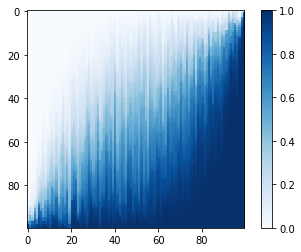

In [13]:
color_map = plt.cm.get_cmap('Blues')

plt.imshow(cost_matrix, cmap=color_map)
plt.colorbar()
plt.show()

In [14]:
eff_assigner = assignment.AssignmentHelperV2(
    cost_matrix, np.ones((N,))
)
eff_assignments = eff_assigner.ip_solve()
eff_costs = eff_assigner.get_cost_increases(
    eff_assignments, increase_matrix=cost_matrix
)

print(eff_costs.sum())
print(eff_costs.max())

34.49359159568792
1.0


In [15]:
lex_assigner = leximin_assignment.LeximinAssignmentHelperV3(
    cost_matrix, np.ones((N,))
)
lex_assignments = lex_assigner.solve()
lex_costs = lex_assigner.get_costs(lex_assignments)

print(lex_costs.sum())
print(lex_costs.max())

48.40896016030275
0.8336482159538726


In [16]:
print(N)
print(lex_costs.sum() / eff_costs.sum())

100
1.4034189517786952
